# 1-Introduction

```
==============================

Name    : Erlangga Jayadipraja

Object  : as a data analyst, you are asked to identify and solve problems for a fashion brand using customer trend data which is then analyzed using statistics and visualized and then looking for conclusions.

==============================
```

**Tableau Visualization**

[Url Tableau](https://public.tableau.com/app/profile/erlangga.jayadipraja/viz/ShoppingTrendsVisualization/Dashboard?publish=yes)

# 2-Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.simplefilter(action='ignore', category=Warning)

# 3-Identification of Problems

***Background***

As the owner of the "R" store which operates in the fashion brand sector which has branches in all states in the United States, you want to know customer shopping trends in all branches in the last year to evaluate and create strategies for the next season.

***SMART***

1. Specific: Want to increase sales at store "R" in the fall season.

2. Measurable: Increase sales in the fall season by 10% from the previous season.

3. Achievable: Based on sales from the previous season, it is expected that sales at "R" stores in the fall season will increase by 10%.

4. Relevant: Sales at "R" stores can increase by 10% from the previous season.

5. Time-Bound: Increase "R" store sales in the fall season.

***Problem Statement***

- Increase "R" store sales in the fall season by 10% based on previous season sales.

***Defining the problem:***
- How many customer segments are there according to age and gender
- Where is the state that has the largest number of sales
- What categories of goods are purchased the most?
- When is the season when customers shop the most
- Confidence inverval of total sales
- What is the relationship between payment methods and the amount of goods sold?
- Does the rating affect the number of sales?
- Do discounts and promo codes affect the number of sales?
- Do members have an influence on the number of sales?

# 4-Data Loading

[URL Data Set](https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset?select=shopping_trends_updated.csv)

In [2]:
# Import data
df = pd.read_csv('shopping_trends_updated.csv')

In [3]:
# Show data
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


There are no inconsistent data values (all data is consistent)

In [4]:
# Show Column
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

Column names can be replaced with all lowercase letters and spaces can be replaced with underscores to make data processing easier

In [5]:
# Show data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

All data types are appropriate

In [6]:
# Cheking data missing value
df.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

There are no missing values

In [7]:
# Cheking data duplicate
df.duplicated().sum()

0

There is no duplicate data

In [8]:
# Cheking total unique value every columns
df.nunique()

Customer ID               3900
Age                         53
Gender                       2
Item Purchased              25
Category                     4
Purchase Amount (USD)       81
Location                    50
Size                         4
Color                       25
Season                       4
Review Rating               26
Subscription Status          2
Shipping Type                6
Discount Applied             2
Promo Code Used              2
Previous Purchases          50
Payment Method               6
Frequency of Purchases       7
dtype: int64

Shows the number of unique values in each column

# 5-Data Cleaning

## 5.1-Cleaning Missing Values

In [9]:
# Remove missing value
df.dropna()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


## 5.2-Filling Missing Value

In [10]:
# Fill missing value with 0
df.fillna(0, inplace=True)

## 5.3-Change the column name

In [11]:
# Change column name to lower case
df.columns = df.columns.str.lower()

# Remove "(" and ")" in column name
df.columns = df.columns.str.replace('(','')
df.columns = df.columns.str.replace(')','')

# Change whitespace in column name with ("_")
df.columns = df.columns.str.replace(' ','_')

In [12]:
# Show columns
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_usd', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='object')

All column names are correct

# 6-EDA

## 6.1-What is the number of customer segments by age and gender

### 6.1.1-Divide ages according to WHO age classification

**Age classification according to WHO**


[Age Classification](https://www.sehatq.com/artikel/risiko-penyakit-berdasarkan-klasifikasi-umur-menurut-who)

**Classifying age according to WHO**

In [13]:
df['age_group'] = pd.cut(df['age'], [0, 2, 11, 20, 61, 101], labels= ['Infants', 'Children', 'Adolecenst', 'Adult', 'Elderly'])
df

,customer_id,age,gender,item_purchased,category,purchase_amount_usd,location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,promo_code_used,previous_purchases,payment_method,frequency_of_purchases,age_group
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Adult
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,Adolecenst
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Adult
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,Adult
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,Adult
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,Adult
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,Adult
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,Adult


### 6.1.2-Percentage by age

In [14]:
df['age_group'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%'

age_group
Adult         77.7%
Elderly       16.9%
Adolecenst     5.4%
Infants        0.0%
Children       0.0%
Name: proportion, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

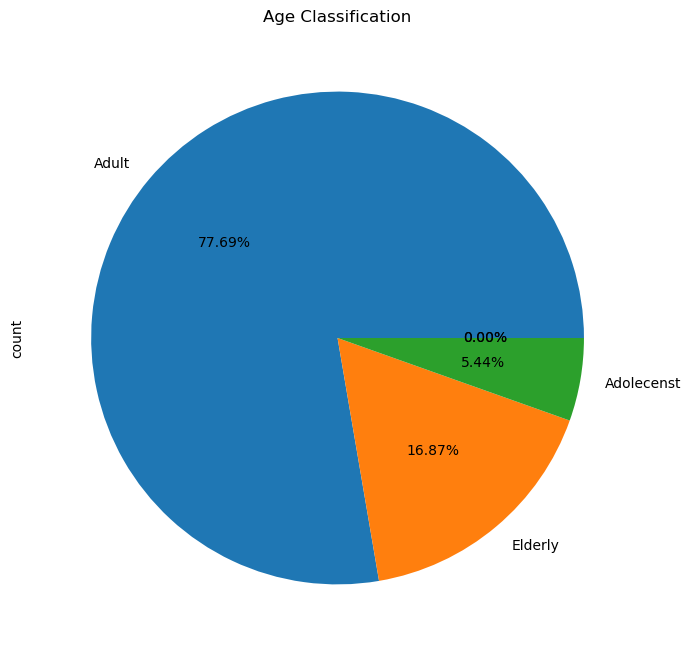

In [15]:
plt.figure(figsize=(8,8))
df['age_group'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.title('Age Classification')
plt.show

**Insight**

- The percentage of buyers in the "R" store is Eldery (16.9%), Adult is (77.7%) and Adolescent is (5.4%) and there are no Children and Infants, so the largest age category of buyers at the "R" store is Adult. and the lowest is Adolecenst

### 6.1.3-Percentage by gender

In [16]:
df['gender'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%'

gender
Male      68.0%
Female    32.0%
Name: proportion, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

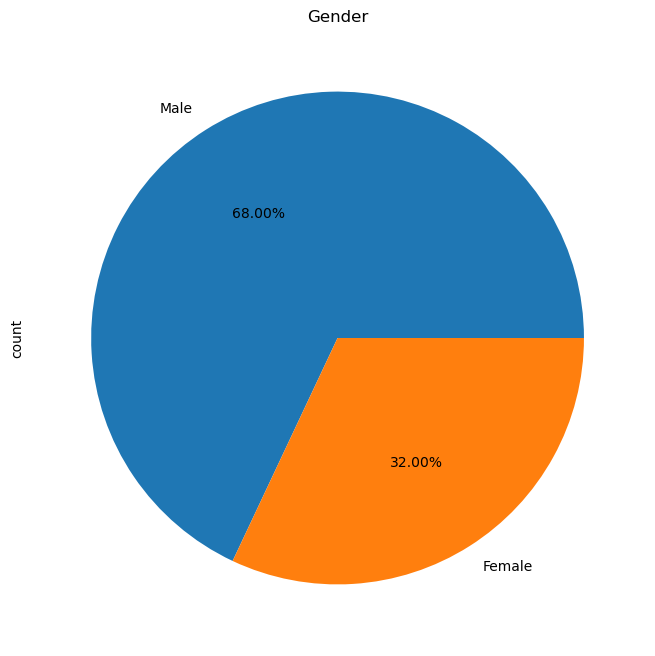

In [17]:
plt.figure(figsize=(8,8))
df['gender'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.title('Gender')
plt.show

**Insight**

- The gender percentage of buyers at the "R" store is divided into men (68.0%) and women (32.0%), so the percentage of buyers who are male is greater than female.

### 6.1.4-Number of ages and gender

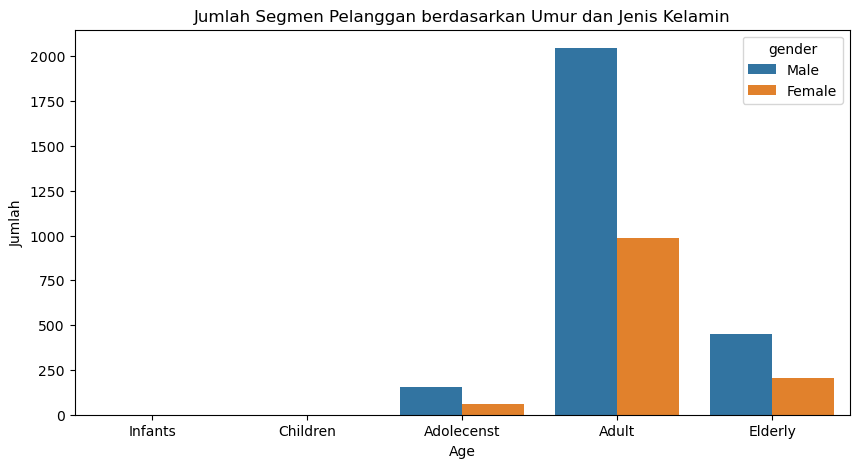

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x='age_group',hue='gender', data=df)
plt.title('Jumlah Segmen Pelanggan berdasarkan Umur dan Jenis Kelamin')
plt.xlabel('Age')
plt.ylabel('Jumlah')
plt.show()

**Insight**

- The majority of buyers in the "R" shop are men rather than women and the number of buyers in the "R" shop in the Adult age range is very large compared to Elderly and Adolescent, in fact there are no buyers in the "R" shop in the Infants and Children age range

## 6.2-Which State has the largest number of sales

In [19]:
df1 = df.groupby('location')['purchase_amount_usd'].sum().reset_index(name='total_purchase')
df1 = df1.sort_values(by='total_purchase', ascending = False)

### 6.2.1-Top five total sales in each state

In [20]:
df1.head()

,location,total_purchase
25,Montana,5784
12,Illinois,5617
4,California,5605
11,Idaho,5587
27,Nevada,5514


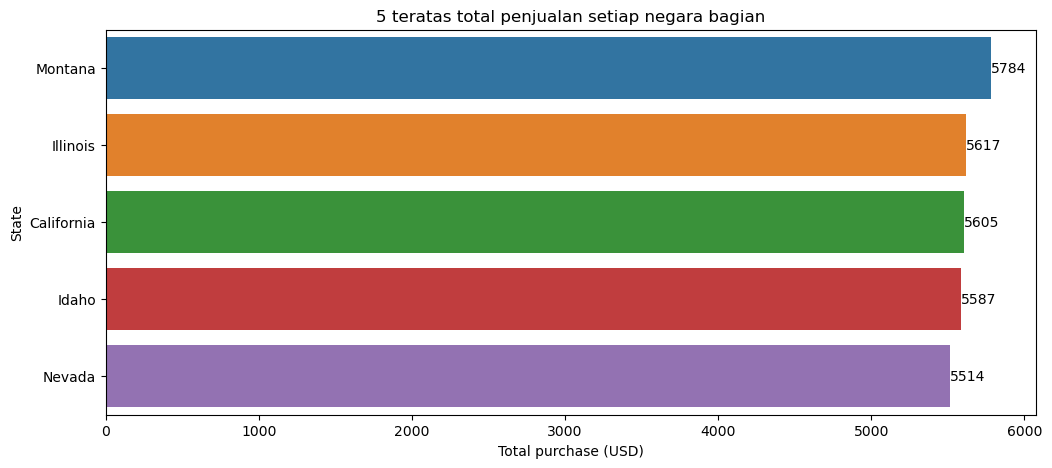

In [21]:
plt.figure(figsize=(12,5))
ax = sns.barplot(x='total_purchase', y='location', data=df1.head())
ax.bar_label(ax.containers[0]);
plt.title('5 teratas total penjualan setiap negara bagian')
plt.xlabel('Total purchase (USD)')
plt.ylabel('State')
plt.show()

**Insight**

- The state of Montana "R" stores get the largest sales, but the distance between the top 5 states is not too different from the order of the largest, namely Montana, Illinois, California, Idaho, Nevada

### 6.2.2-Bottom five total sales in each state

In [22]:
df1.tail()

,location,total_purchase
38,Rhode Island,3871
29,New Jersey,3802
8,Florida,3798
10,Hawaii,3752
15,Kansas,3437


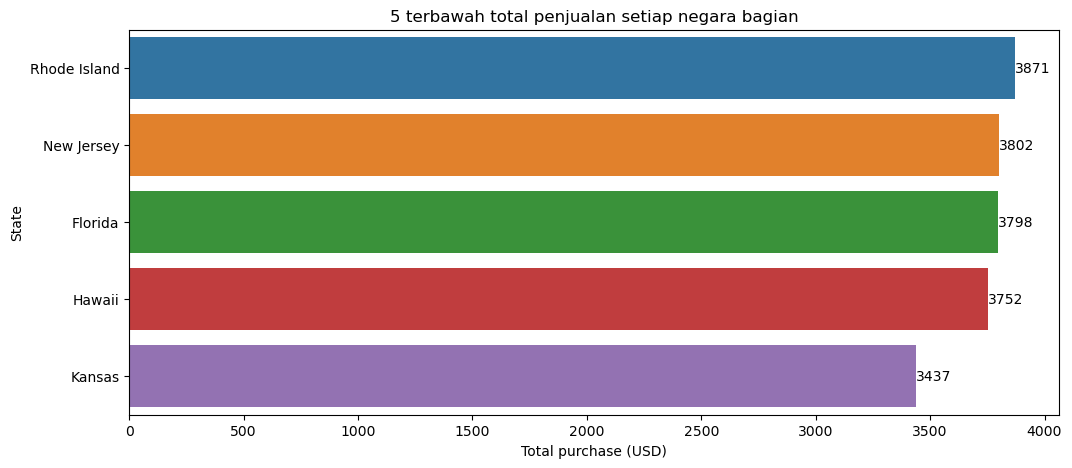

In [23]:
plt.figure(figsize=(12,5))
ax = sns.barplot(x='total_purchase', y='location', data=df1.tail())
ax.bar_label(ax.containers[0]);
plt.title('5 terbawah total penjualan setiap negara bagian')
plt.xlabel('Total purchase (USD)')
plt.ylabel('State')
plt.show()

**Insight**

- The states of Rhode Island, New Jersey, Florida, Hawaii and Kansas are the branches with the smallest sales

### 6.2.3-Total sales in each state

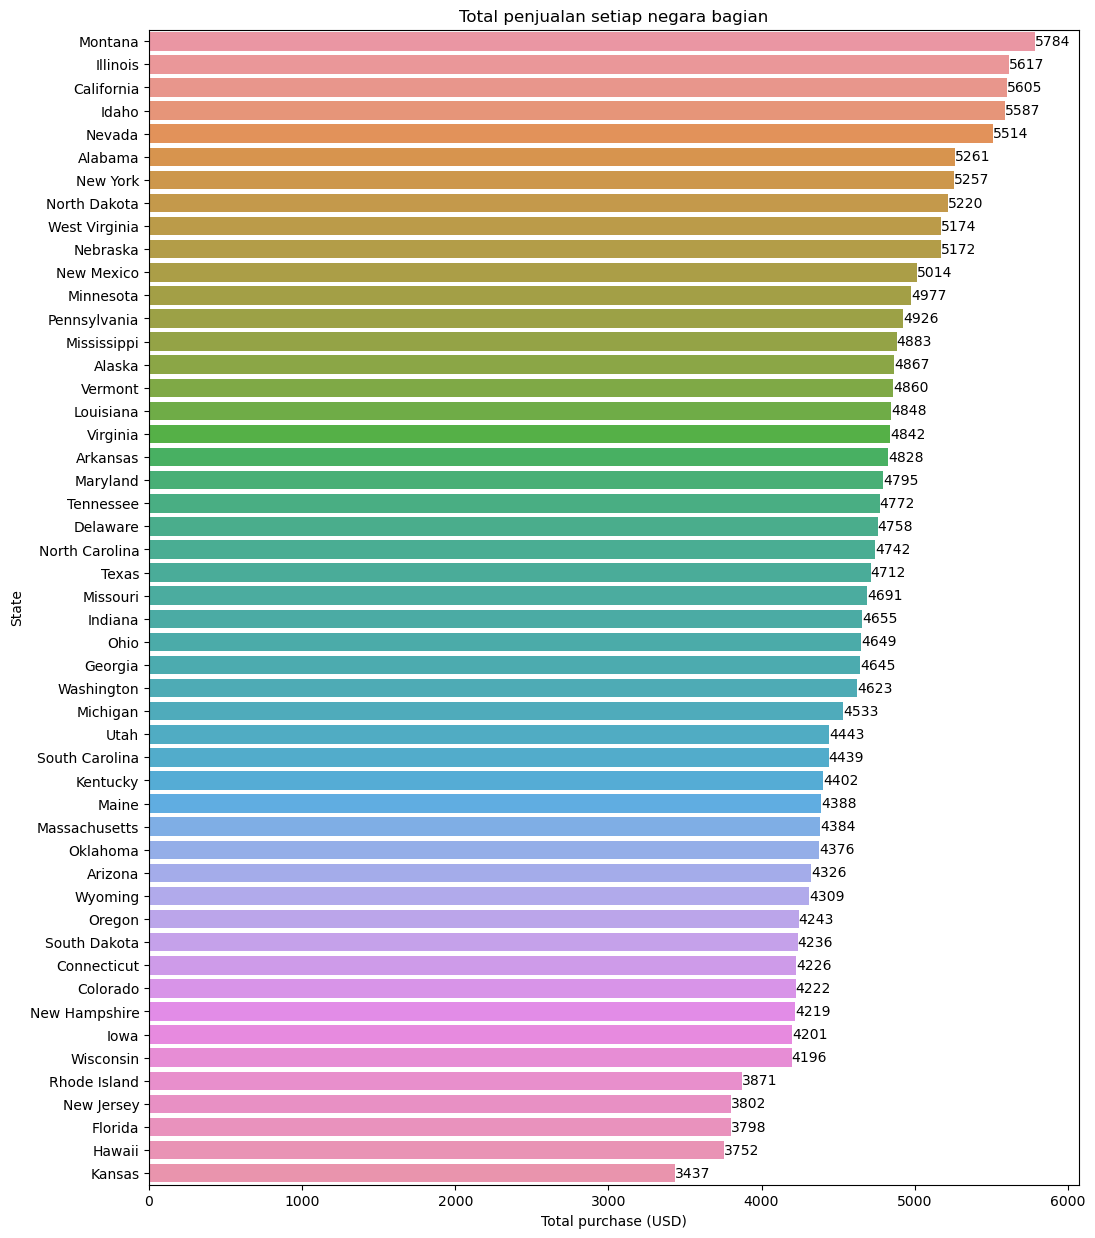

In [24]:
plt.figure(figsize=(12,15))
ax = sns.barplot(x='total_purchase', y='location', data=df1)
ax.bar_label(ax.containers[0]);
plt.title('Total penjualan setiap negara bagian')
plt.xlabel('Total purchase (USD)')
plt.ylabel('State')
plt.show()

**Insight**

- The state with the highest number of purchases at "R" stores is the state of Montana (5784 USD) and the lowest is the state of Kansas (3437 USD)

## 6.3-What is the most purchased category of goods

In [25]:
df2 = df.groupby('category')['purchase_amount_usd'].sum().reset_index(name='category_purchase')
df2 = df2.sort_values(by='category_purchase', ascending = False)

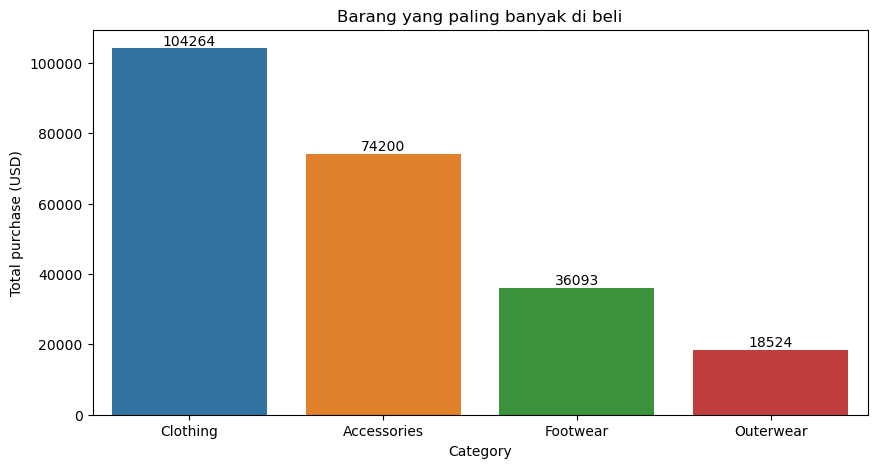

In [26]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='category', y='category_purchase', data=df2)
ax.bar_label(ax.containers[0]);
plt.title('Barang yang paling banyak di beli')
plt.xlabel('Category')
plt.ylabel('Total purchase (USD)')
plt.show()

**Insight**

- The category of goods most purchased in all "R" store branches is Clothing with a total purchase of (104264 USD) followed by the second largest is Accessories with a total purchase of (74200 USD)

## 6.4-When is the season when customers shop the most

**Seasons in the USA**

[Season in USA](https://www.calendarr.com/united-states/seasons-of-the-year-in-the-united-states/)

There are 4 seasons in the United States, namely spring, summer, fall and winter

In [27]:
df3 = df.groupby('season')['purchase_amount_usd'].sum().reset_index(name='season_purchase')

In [28]:
df3

,season,season_purchase
0,Fall,60018
1,Spring,58679
2,Summer,55777
3,Winter,58607


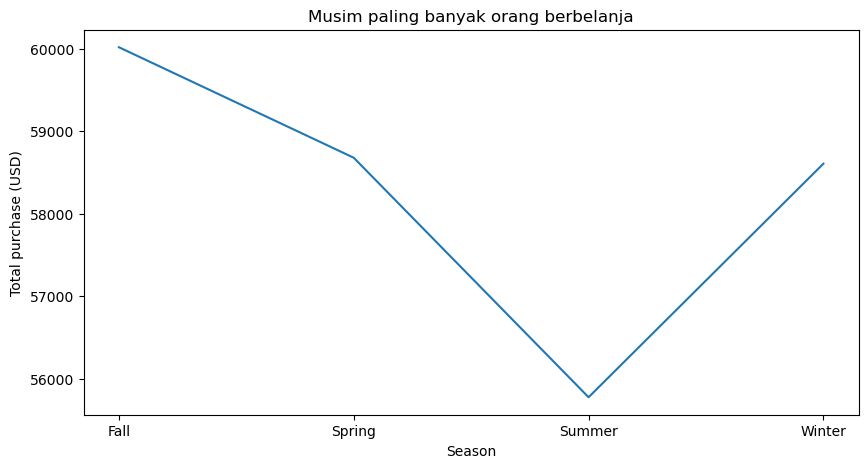

In [29]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df3, x='season',y='season_purchase')
plt.title('Musim paling banyak orang berbelanja')
plt.xlabel('Season')
plt.ylabel('Total purchase (USD)')
plt.show()


**Insight**

- The season with the largest total purchases at "R" stores occurred in the Fall season with total purchases of (60018 USD)
- The season with the smallest total purchases at "R" stores occurred in the Summer season with total purchases of (58607 USD)

## 6.5-Confidence interval of total purchases

### 6.5.1-Measurement of central tendency

In [30]:
print('Average purchase amount(USD):', df['purchase_amount_usd'].mean(), 'USD')
print('Median purchase amount(USD):', df['purchase_amount_usd'].median(), 'USD')
print('Mode purchase amount(USD):', df['purchase_amount_usd'].mode().values[0],'USD')

Average purchase amount(USD): 59.76435897435898 USD
Median purchase amount(USD): 60.0 USD
Mode purchase amount(USD): 32 USD


The mean and median are very close meaning the data is normally distributed

### 6.5.2-Calculating skewness and kurtosis

In [31]:
print(f"Skewness: {df['purchase_amount_usd'].skew()}")
print(f"Kurtosis: {df['purchase_amount_usd'].kurtosis()}")

Skewness: 0.012701757626433795
Kurtosis: -1.236593691266159


Skewness between -0.5 and 0.5 normal data distribution

### 6.5.3-Check for outliers

Due to skewness between -0.5 and 0.5, checking and handling outliers uses Z-score

In [32]:
avg = df['purchase_amount_usd'].mean()
std = df['purchase_amount_usd'].std()

up_bound = avg + 3*std
low_bound = avg - 3*std

print(f'Upper Boundary: {up_bound:.2f}')
print(f'Lower Boundary: {low_bound:.2f}')

Upper Boundary: 130.82
Lower Boundary: -11.29


In [33]:
outlier = df['purchase_amount_usd'][(df['purchase_amount_usd']<low_bound) | (df['purchase_amount_usd']>up_bound)]
no_outlier = df['purchase_amount_usd'][(df['purchase_amount_usd']>=low_bound) & (df['purchase_amount_usd']<=up_bound)]

print(f'Percentage of outliers: {len(outlier)*100/len(df["purchase_amount_usd"]):.2f}%')

Percentage of outliers: 0.00%


There are no outliers

<Axes: >

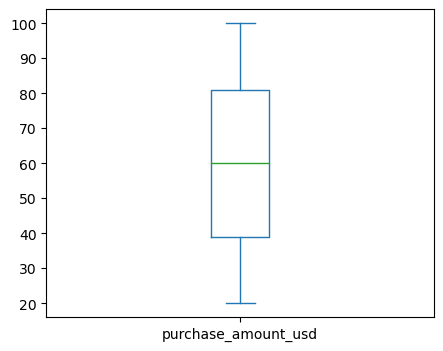

In [34]:
fig, ax = plt.subplots(figsize=(5,4))
no_outlier.plot(kind='box')

The visualization shows there are no outliers

### 6.5.4-Calculation of Confidence interval for total purchases

In [35]:
std_purchase = df['purchase_amount_usd'].std()
N = len(df)
low, up = stats.norm.interval(0.95, loc=df['purchase_amount_usd'].mean(),scale=std_purchase/np.sqrt(N))

print('Potensi minimum penjualan: ',low, ' USD')
print('Potensi maksimum penjualan: ',up, ' USD')

Potensi minimum penjualan:  59.021003799812476  USD
Potensi maksimum penjualan:  60.50771414890548  USD


**Insight**

- Based on the confidence interval calculation, it can be concluded that the total sales potential at store "R" is between (59.0 USD) to (60.5 USD)

## 6.6-How is the relationship between payment methods and the amount of goods purchased

Hypothesis testing uses ANOVA (Analysis of Variance) because there are more than 3 groups being tested

In [36]:
venmo = df[df['payment_method']=='Venmo'].groupby('purchase_amount_usd')['purchase_amount_usd'].sum()
cash = df[df['payment_method']=='Cash'].groupby('purchase_amount_usd')['purchase_amount_usd'].sum()
credit_card = df[df['payment_method']=='Credit Card'].groupby('purchase_amount_usd')['purchase_amount_usd'].sum()
paypal = df[df['payment_method']=='PayPal'].groupby('purchase_amount_usd')['purchase_amount_usd'].sum()
bank_transfer = df[df['payment_method']=='Bank Transfer'].groupby('purchase_amount_usd')['purchase_amount_usd'].sum()
debit_card = df[df['payment_method']=='Debit Card'].groupby('purchase_amount_usd')['purchase_amount_usd'].sum()

In [37]:
print(f'Venmo: {venmo.mean():.2f}')
print(f'Cash: {cash.mean():.2f}')
print(f'Credit Card: {credit_card.mean():.2f}')
print(f'Paypal: {paypal.mean():.2f}')
print(f'Bank Transfer: {bank_transfer.mean():.2f}')
print(f'Debit Card: {debit_card.mean():.2f}')

Venmo: 461.41
Cash: 493.85
Credit Card: 497.65
Paypal: 495.17
Bank Transfer: 451.16
Debit Card: 478.30


H0 = There is no significant difference between payment methods

H1 = There is a significant difference between payment methods

In [38]:
res = stats.f_oneway(venmo, cash, credit_card, paypal, bank_transfer, debit_card)
print('P-value:', res.pvalue)

P-value: 0.8213871269111752


**Insight**

- Because the p-value is more than 0.05, so H0 fails to be rejected, meaning there is no significant difference between the payment methods Venmo, Cash, Credit Card, Paypal, Bank Transfer, Debit Card for shopping at store "R" so use any payment method has no effect on sales of store "R"

## 6.7-What effect does the rating have on the number of purchases

The rating scale is grouped into five

[Rating scale](https://www.performyard.com/articles/performance-review-ratings-scales-examples#:~:text=High%2Dperforming%20employees%20often%20receive,3%20(Meets%20Expectations)%20rating.)

In [39]:
df['rating_group'] = pd.cut(df['review_rating'], [0, 1, 2, 3, 4, 5], labels= ['Poor', 'Below Average', 'Good', 'Very Good', 'Outstanding'])

In [40]:
df['rating_group'].unique()

['Very Good', 'Good', 'Outstanding']
Categories (5, object): ['Poor' < 'Below Average' < 'Good' < 'Very Good' < 'Outstanding']

Because there are only 3 groups used in the data, the hypothesis tested is only from those 3 groups and the test uses ANOVA (Analysis of Variance).

In [41]:
outstanding = df[df['rating_group']=='Outstanding'].groupby('purchase_amount_usd')['purchase_amount_usd'].sum()
very_good = df[df['rating_group']=='Very Good'].groupby('purchase_amount_usd')['purchase_amount_usd'].sum()
good = df[df['rating_group']=='Good'].groupby('purchase_amount_usd')['purchase_amount_usd'].sum()

In [42]:
print(f'Outstanding: {outstanding.mean():.2f}')
print(f'Very Good: {very_good.mean():.2f}')
print(f'Good: {good.mean():.2f}')

Outstanding: 1097.32
Very Good: 1163.89
Good: 616.33


H0 = There is no significant difference between ratings

H1 = There is a significant difference between ratings

In [43]:
res = stats.f_oneway(outstanding, very_good, good)
print('P-value:',res.pvalue)

P-value: 2.606380202483577e-13


**Insight**

- Because the p-value is less than 0.05, H0 is successfully rejected, meaning there is a significant difference between the rating and sales at store "R", which means that the rating has a big influence on sales at store "R"

## 6.8-Do discounts and promo codes affect the number of sales

In [44]:
df['discount_applied'].value_counts()

discount_applied
No     2223
Yes    1677
Name: count, dtype: int64

In [45]:
df['promo_code_used'].value_counts()

promo_code_used
No     2223
Yes    1677
Name: count, dtype: int64

Because the data contents of the 'discount_applied' and 'promo_code_used' columns are the same, only 1 column is tested for the hypothesis.

H0 = Discounts and promo codes have no effect on the number of purchases

H1 = Discounts and promo codes influence the number of purchases

In [46]:
# Contigency Table
contingency_table_discount = pd.crosstab(df['purchase_amount_usd'], df['discount_applied'])
contingency_table_discount

discount_applied,No,Yes
purchase_amount_usd,,
20,31,21
21,26,20
22,21,23
23,32,25
24,23,27
...,...,...
96,36,17
97,36,19
98,37,15


In [47]:
res = stats.chi2_contingency(contingency_table_discount)
print("P-value:",res.pvalue)

P-value: 0.43143488537830815


**Insight**

- Because the p-value is more than 0.05, H0 fails to be rejected, meaning that promo codes and discounts have no effect on the number of purchases at store "R" so that even without discounts and promo codes the number of purchases at store "R" does not decrease

## 6.9-Does membership affect the number of purchases

In [48]:
# Contigency Table
contingency_table_subscription = pd.crosstab(df['purchase_amount_usd'], df['subscription_status'])
contingency_table_subscription

subscription_status,No,Yes
purchase_amount_usd,,
20,36,16
21,38,8
22,29,15
23,48,9
24,32,18
...,...,...
96,44,9
97,46,9
98,44,8


H0 = Membership has no effect on the number of purchases

H1 = Membership influences the number of purchases

In [49]:
res = stats.chi2_contingency(contingency_table_subscription)
print("P-value:",res.pvalue)

P-value: 0.0696375925188147


**Insight**

-Because the p-value is more than 0.05, H0 fails to be rejected, meaning that membership has no effect on the number of purchases at store "R" but because the p-value is 0.069 there is a slight effect

# 7-Conclusion

To increase sales by 10% in the fall season from the previous season, you can do several things, namely:

- Due to the large number of "R" shop customers who are male and the majority are also in the 'Adult' age range, we can increase the number of products that are liked by men in the 'Adult' age range.

- Because "R" stores in the state of Montana get the most sales, the strategies carried out in the state of Montana can be applied to "R" stores in other states and for "R" store branches in the state of Montana itself can continue to strive to get the highest income.

- The category of goods that is most often purchased at "R" stores is clothing and the second is accessories, therefore it can increase the number of goods in the Clothing and accessories categories in "R" stores.

- In the Fall season, purchases at the "R" store get the largest number of purchases, therefore, in order to maintain sales levels, continue to implement existing strategies and continue to increase sales

- Because review ratings are very important for sales at "R" stores, therefore you must always monitor the quality of the goods sold so that goods sold from "R" stores do not get low ratings.

- Even though discounts and promotions have no effect, they are still carried out as promotional media

- Continue to use the membership system to attract more customers

# 8-Saving Clean Data

In [50]:
df.to_csv('shopping_clean.csv')